ПРЕДСКАЗАНИЕ МЕДИАННОЙ СТОИМОСТИ ДОМА

#***Предварительный анализ и подготовка данных***

//Загрузка библиотек и данных

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("train.csv", parse_dates=[0])

df.head()

<ipython-input-2-f6ee4b7ae502>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("train.csv", parse_dates=[0])


,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [ ]:
print(df.isnull().sum())

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


//пропусков нет

In [ ]:
df.shape

(37137, 10)

//размеры нашего датасета (10 столбцов и 37137 строчек)

In [ ]:
df['MedHouseVal'].describe()

,MedHouseVal
count,37137.000000
mean,2.079751
std,1.158571
min,0.149990
25%,1.208000
50%,1.808000
75%,2.660000
max,5.000010


//по данным можно сделать некоторые выводы:\
*стандартное отклонение имеет приемлемое значение(не большое, но и не нулевое совсем)\
*минимум почти равен 0\
*существует небольшая, но разница между минимальным значением и 25-м процентом\
*разница между 75-м процентом и максимумом больше, чем 25-й процентом и максимум

//распределение сильно скошено

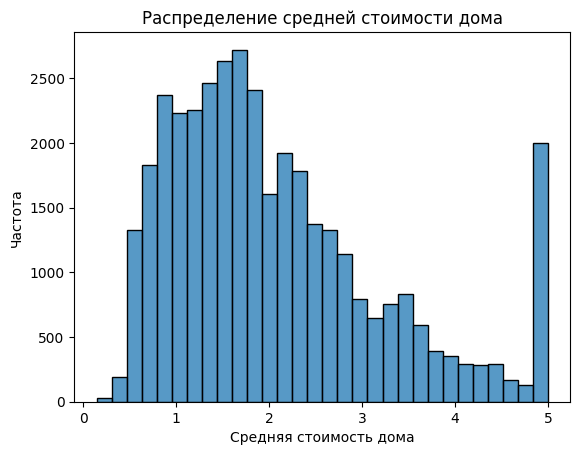

In [ ]:
sns.histplot(df['MedHouseVal'], bins=30)
plt.title('Распределение средней стоимости дома')
plt.xlabel('Средняя стоимость дома')
plt.ylabel('Частота')
plt.show()

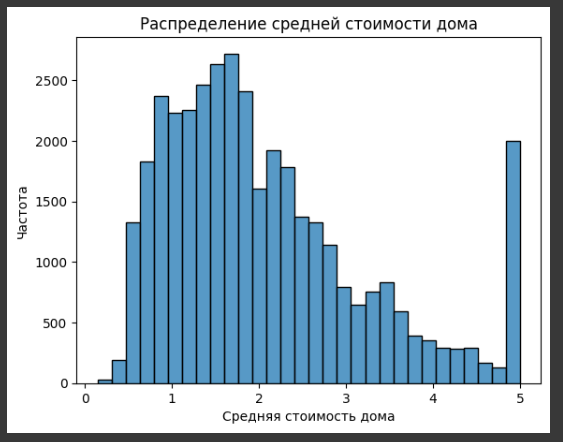

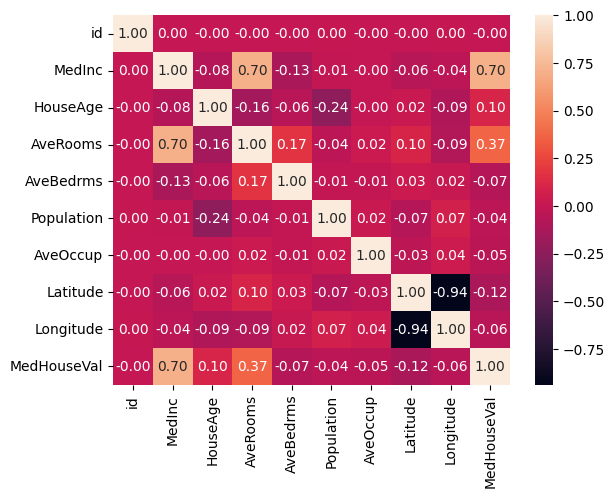

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt =".2f")
plt.show()

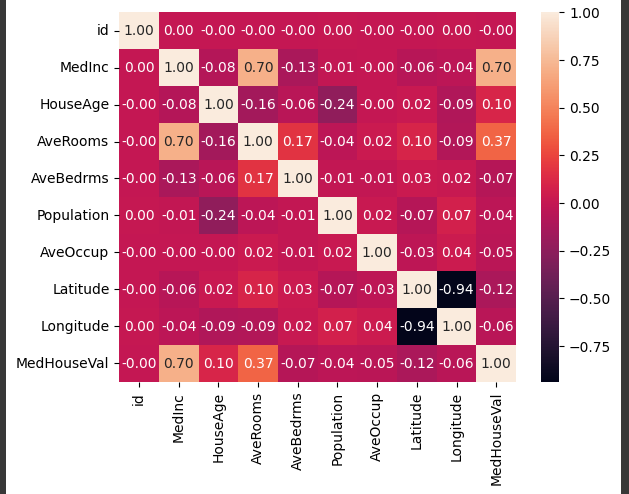

//с помощью корреляции мы можем понять, какие предикторы наиболее значимы(MedInc, HouseAge, AveRooms)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

//проверяем все ли переменные в нужных форматах

#***Разделение данных***

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

//разделение данных на обучающую и тестовую выборки

#***Модели***

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

//выбор модели(линейная регрессия)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5442926093731739
Mean Squared Error: 0.5597357262879418
R2 score: 0.5882730401141985


//R2 > 0, что очень хорошо => 58% изменчивости целевой переменной объясняется моделью

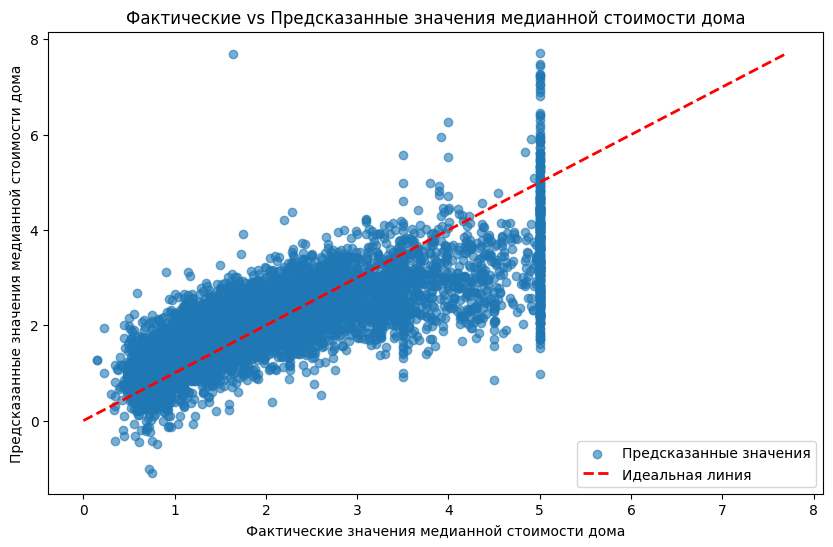

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Предсказанные значения')
plt.xlabel('Фактические значения медианной стоимости дома')
plt.ylabel('Предсказанные значения медианной стоимости дома')
plt.title('Фактические vs Предсказанные значения медианной стоимости дома')

max_value = max(max(y_test), max(y_pred))
plt.plot([0, max_value], [0, max_value], '--r', lw=2, label='Идеальная линия')

plt.legend()
plt.show()

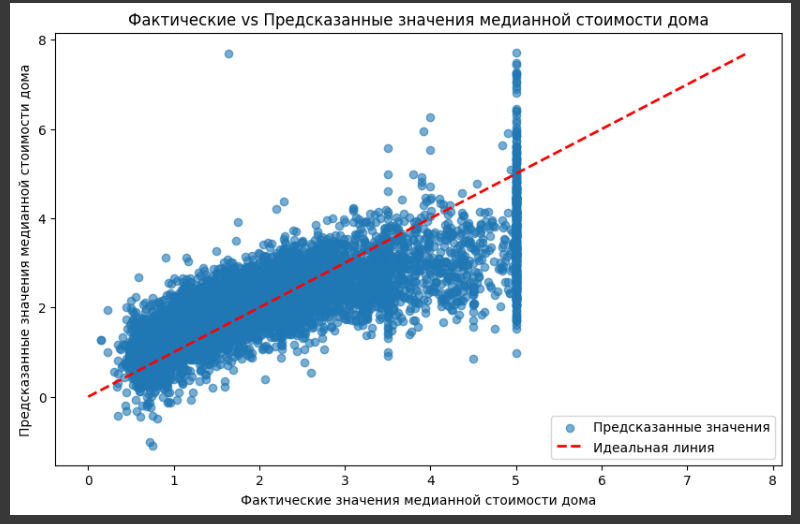

//простое усреднение

In [ ]:
val = y_test.mean()
y_pred = np.full(y_test.shape, val)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.9194030674148727
Mean Squared Error: 1.35948281463811
R2 score: 0.0


#Вывод:

**Вывод по метрикам основном модели:**
* MSE = 0,56, что говорит о том, что в среднем квадрат ошибки относительно предсказаний модели довольно мал, чем меньше значение MSE, тем лучше модель.
* MAE = 0,54, что говорит о том, что модель в среднем ошибается на 0.54 единицы. MAE более интуитивно понятно, чем MSE, поскольку оно не возводит ошибки в квадрат и отражает среднюю ошибку в тех же единицах, что и целевая переменная.
* R2 = 0.58, что говорит о том, говорит о том, что около 58% вариации в целевой переменной может быть объяснено моделью.

**Общий вывод:**  \
В целом, модель демонстрирует умеренные результаты, с MSE и MAE, которые указывают на небольшие ошибки в предсказаниях, и R² = 0.58, что указывает на то, что модель объясняет более половины вариации целевой переменной. Не всё идеально, но оно работает!